![banner](./img/smc_gis_28_banner.png)

# Lesson 11 - Fetching Data - APIs

- ## First Read Pages 4-6 and the first half of 7 from https://api-first-world.com/

![api_world_p4.png](./img/api_world_p4.png)
![api_world_p5.png](./img/api_world_p5.png)
![api_world_p6.png](./img/api_world_p6.png)
![api_world_p7.png](./img/api_world_p7.png)

---

## API (Application Programming Interface)

> An application programming interface (API) is a connection between computers or between computer programs. It is a type of software interface, offering a service to other pieces of software

[`https://en.wikipedia.org/wiki/Application_programming_interface`](An application programming interface (API) is a connection between computers or between computer programs. It is a type of software interface, offering a service to other pieces of software)

## JSON (**J**ava**S**cript **O**bject **N**otation)
> JSON (JavaScript Object Notation) is a lightweight data-interchange format. It is easy for humans to read and write. It is easy for machines to parse and generate.
- Remember `dict`s from earlier?  JSONs look mostly like nested `dict`s.
- It can have pretty much can take any structure

[`https://www.json.org/`](https://www.json.org/)



## geoJSON
> GeoJSON is a geospatial data interchange format based on JavaScript Object Notation (JSON)

- The specifications for it are in the [RFC](https://datatracker.ietf.org/doc/html/rfc7946)
- Essentially, it adheres to this structure: 
```
{
  "type": "FeatureCollection",
  "features": []
}
```

- click here https://usc.data.socrata.com/resource/9utn-waje.json?name=Santa+Monica

### Useful Browser Plugin

Download **[JSON Viewer](https://chrome.google.com/webstore/detail/json-viewer/gbmdgpbipfallnflgajpaliibnhdgobh?hl=en-US) (or something similar) for prettier JSON rendering in your browser.**

- Most APIs respond with JSON, many of the ones we use respond with geoJSON.

In [1]:
import urllib, json

sm_neighborhood_request_url = 'https://usc.data.socrata.com/resource/9utn-waje.json?name=Santa+Monica'
sm_neighborhoods = json.loads(urllib.request.urlopen(sm_neighborhood_request_url).read())
sm_neighborhoods

[{'set': 'L.A. County Neighborhoods (Current)',
  'slug': 'santa-monica',
  'the_geom': {'type': 'MultiPolygon',
   'coordinates': [[[[-118.48398100000013, 34.04163499912409],
      [-118.48376600000012, 34.04142999912412],
      [-118.48194000000015, 34.04287299912418],
      [-118.48001500000022, 34.04445599912408],
      [-118.4801610000002, 34.04452899912418],
      [-118.4797450000002, 34.044702999124084],
      [-118.47964700000001, 34.04510699912413],
      [-118.47913600000018, 34.04518899912399],
      [-118.47901500000022, 34.04568699912399],
      [-118.47843800000012, 34.04562899912405],
      [-118.47834800000024, 34.04626499912408],
      [-118.4772830000001, 34.0466989991241],
      [-118.47438200000022, 34.04420799912416],
      [-118.47427800000011, 34.04431399912402],
      [-118.47372100000022, 34.044035999124084],
      [-118.47127500000013, 34.041941999124],
      [-118.47151300000017, 34.041748999124195],
      [-118.4591750000001, 34.0313279991243],
      [-118.4

## Pop Quiz: Is the above output valid geoJSON?
- Try an answer by reading the geoJSON section a few cells above.
- Confirm your understanding by pasting the above json/geojson output into http://geojson.io
- Spend a few minutes playing with http://geojson.io!

---
## Answer


![its_json.png](./img/its_json.png)![its_geojson.png](./img/its_geojson.png)

No.  It's just JSON.  It doesn't adhere to the structure in the [RFC](https://datatracker.ietf.org/doc/html/rfc7946).

---

# API request Example:



### US Census API
First go here and try to get something:

[![census_api_homepage]()](https://www.census.gov/developers/)
What if there were a way to transfer to your just the rows and columns of data you want (without getting lost through 100 clicks down the rabit whole which is the census website)?



Let's use the following url example for the US Census API:

`https://api.census.gov/data/2019/acs/acs5?get=B01003_001E&for=tract:*&in=state:06&in=county:037`

This magic url is giving me exactly the data I want.

### URL Breakdown:

---

**This part is the 'end point' (ultimate web address which will respond to your queries).**

```
https://api.census.gov/data/2019/acs/acs5?get=B01003_001E&for=tract:*&in=state:06&in=county:037
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
```

---

**This part indicates the start of a query (what you're asking the server to return to you).**

```
https://api.census.gov/data/2019/acs/acs5?get=B01003_001E&for=tract:*&in=state:06&in=county:037
                                         ^
```

--- 

**Your query (specified however the builders of the API tell you to ask questions) broken down below**

```
https://api.census.gov/data/2019/acs/acs5?get=B01003_001E&for=tract:*&in=state:06&in=county:037
                                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
```
- **Note that seperate parameters are seperated by an `&`**
- **in this example, the census people wanted conditions expressed as parameter = value , e.g. `state=06` (explained more below)**

---

**Fetch me info about `B01003_001E` which is the Total Population estimate for given Geography**

```
https://api.census.gov/data/2019/acs/acs5?get=B01003_001E&for=tract:*&in=state:06&in=county:037
                                          ^^^^^^^^^^^^^^^
```


---

**For all the tracts...**

```
https://api.census.gov/data/2019/acs/acs5?get=B01003_001E&for=tract:*&in=state:06&in=county:037
                                                          ^^^^^^^^^^
```
---

**... in state 06 (California) ...**

```
https://api.census.gov/data/2019/acs/acs5?get=B01003_001E&for=tract:*&in=state:06&in=county:037
                                                                      ^^^^^^^^^^^
```
---

**... in county 37 (Los Angeles County) ...**

```
https://api.census.gov/data/2019/acs/acs5?get=B01003_001E&for=tract:*&in=state:06&in=county:037
                                                                                  ^^^^^^^^^^^^^
```
---



# OK. So that was the Question.  What was the answer?
# click https://api.census.gov/data/2019/acs/acs5?get=B01003_001E&for=tract:*&in=state:06&in=county:037



![api_example_census_acs_la_county_response.png](./img/api_example_census_acs_la_county_response.png)

## What else can we ask?  (American Community Survey (ACS) API Variables)

[US Census American Community Survey (ACS) Variables](https://api.census.gov/data/2019/acs/acs1/variables.html).
- Find the API docs and figure out how to find the income levels (e.g. `B06011_001E`)

In [2]:
acs_url = 'https://api.census.gov/data/2020/acs/acs5?get=B01003_001E&for=tract:*&in=state:06&in=county:037'

In [3]:
import json
import requests

In [4]:
acs_response = requests.get(acs_url)

In [5]:
acs_json_data = json.loads(acs_response.text)

In [6]:
acs_json_data[:10]

[['B01003_001E', 'state', 'county', 'tract'],
 ['3006', '06', '037', '199700'],
 ['3618', '06', '037', '199801'],
 ['2419', '06', '037', '199802'],
 ['2687', '06', '037', '199900'],
 ['2203', '06', '037', '201110'],
 ['4043', '06', '037', '201120'],
 ['2709', '06', '037', '201200'],
 ['4377', '06', '037', '201301'],
 ['4247', '06', '037', '201302']]

In [7]:
import pandas as pd

population_acs_2020_data_pdf = pd.DataFrame(acs_json_data)

population_acs_2020_data_pdf

,0,1,2,3
0,B01003_001E,state,county,tract
1,3006,06,037,199700
2,3618,06,037,199801
3,2419,06,037,199802
4,2687,06,037,199900
...,...,...,...,...
2494,3872,06,037,554516
2495,4353,06,037,554517
2496,5129,06,037,554518
2497,3671,06,037,554519


In [8]:
population_acs_2020_data_pdf = pd.DataFrame(
    data=acs_json_data[1:],
    columns=acs_json_data[:1][0]
)

population_acs_2020_data_pdf

,B01003_001E,state,county,tract
0,3006,06,037,199700
1,3618,06,037,199801
2,2419,06,037,199802
3,2687,06,037,199900
4,2203,06,037,201110
...,...,...,...,...
2493,3872,06,037,554516
2494,4353,06,037,554517
2495,5129,06,037,554518
2496,3671,06,037,554519


In [9]:
population_acs_2020_data_pdf.to_csv('./data/population_acs_2020_la_county.csv')

In [10]:
#### OK, and nobody really speaks 'Census' so change that code into somethign normal people can read

In [11]:
population_acs_2020_data_pdf.rename(columns={'B01003_001E':'total_population'},inplace=True)

# Data + Geometries = GeoData

- The data we got above is just data.  There's no geometry.

###  Now let's get some linefiles so we can put this data on a map 

In [12]:
import urllib
file_url = 'https://www2.census.gov/geo/tiger/TIGER2020/TRACT/tl_2020_06_tract.zip'
urllib.request.urlretrieve(file_url, 'data/tl_2020_06_tract.zip')

('data/tl_2020_06_tract.zip', <http.client.HTTPMessage at 0x7f5ce1ff0040>)

In [13]:
import zipfile
z = zipfile.ZipFile('data/tl_2020_06_tract.zip')

z

<zipfile.ZipFile filename='data/tl_2020_06_tract.zip' mode='r'>

In [14]:
z.extractall('data/extracted_tiger_line_shape_files/')

In [15]:
import glob
import geopandas as gpd

In [16]:
# list_of_tract_gdf = []

# for shp in glob.glob('data/extracted_tiger_line_shape_files/*.shp'):
#     tract_shapes_2020_gdf = gpd.read_file(shp)
    
#     list_of_tract_gdf.append(tract_shapes_2020_gdf)

In [17]:
tract_shapes_2020_gdf = gpd.read_file('data/extracted_tiger_line_shape_files/tl_2020_06_tract.shp')

## Narrow Down the Geometries

<AxesSubplot:>

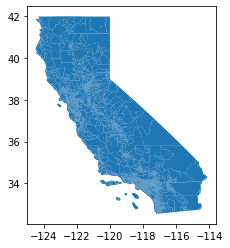

In [18]:
tract_shapes_2020_gdf.plot()

<AxesSubplot:>

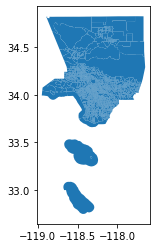

In [19]:
tract_shapes_2020_gdf[tract_shapes_2020_gdf['COUNTYFP']=='037'].plot()

## Now Attach the Data to the Geometries

In [20]:
tract_shapes_with_pop_all_attr_gdf = pd.merge(tract_shapes_2020_gdf[tract_shapes_2020_gdf['COUNTYFP']=='037'],population_acs_2020_data_pdf,how='inner',left_on='TRACTCE',right_on='tract')

In [21]:
tract_shapes_with_pop_gdf = tract_shapes_with_pop_all_attr_gdf[['tract','state','county','total_population','geometry']]

In [22]:
tract_shapes_with_pop_gdf

,tract,state,county,total_population,geometry
0,262601,06,037,3478,"POLYGON ((-118.57556 34.08019, -118.57497 34.0..."
1,300100,06,037,6279,"POLYGON ((-118.24859 34.23881, -118.24858 34.2..."
2,300501,06,037,3039,"POLYGON ((-118.24875 34.22249, -118.24875 34.2..."
3,310701,06,037,2121,"POLYGON ((-118.31952 34.18495, -118.31915 34.1..."
4,300200,06,037,5378,"POLYGON ((-118.24864 34.23324, -118.24863 34.2..."
...,...,...,...,...,...
2493,194500,06,037,2070,"POLYGON ((-118.37880 34.07639, -118.37865 34.0..."
2494,195100,06,037,5193,"POLYGON ((-118.27691 34.09584, -118.27680 34.0..."
2495,195300,06,037,2798,"POLYGON ((-118.29177 34.10178, -118.28959 34.1..."
2496,137501,06,037,5254,"POLYGON ((-118.58837 34.16640, -118.58826 34.1..."


In [23]:
tract_shapes_with_pop_gdf.dtypes

tract                 object
state                 object
county                object
total_population      object
geometry            geometry
dtype: object

In [24]:
tract_shapes_with_pop_gdf['total_population'] = pd.to_numeric(tract_shapes_with_pop_gdf['total_population'])
# tract_shapes_with_pop_gdf['total_population'] = tract_shapes_with_pop_gdf['total_population'].astype('int64')
# tract_shapes_with_pop_gdf.loc[: , 'total_population'] = pd.to_numeric(tract_shapes_with_pop_gdf['total_population'])


# Ignore the SettingWithCopyWarning
# https://www.dataquest.io/blog/settingwithcopywarning/

/home/javier/miniconda3/envs/gis/lib/python3.10/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [25]:
tract_shapes_with_pop_gdf.dtypes

tract                 object
state                 object
county                object
total_population       int64
geometry            geometry
dtype: object

In [26]:
tract_shapes_with_pop_gdf['total_population'].value_counts()

0        20
3590      5
3526      5
3969      5
3181      5
         ..
3996      1
5990      1
4028      1
6380      1
10065     1
Name: total_population, Length: 1970, dtype: int64

In [27]:
tract_shapes_with_pop_gdf['total_population'] > 1000

0       True
1       True
2       True
3       True
4       True
        ... 
2493    True
2494    True
2495    True
2496    True
2497    True
Name: total_population, Length: 2498, dtype: bool

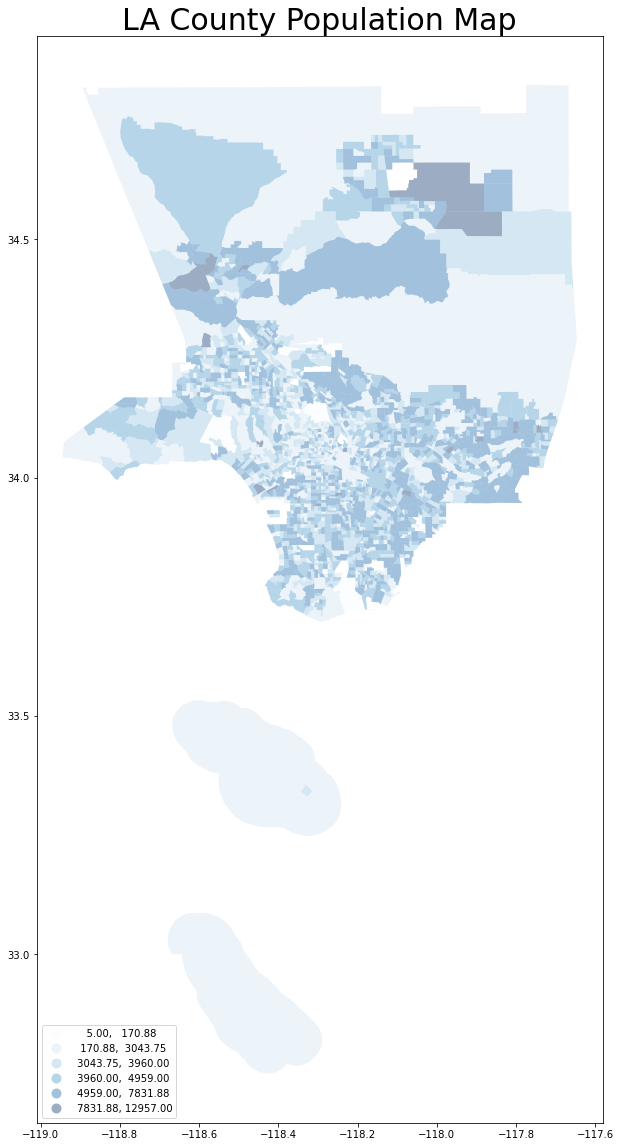

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20))

tract_shapes_with_pop_gdf[tract_shapes_with_pop_gdf['total_population'] > 0].plot(
    ax=ax, 
    alpha = .4,
    column='total_population',
    scheme='BoxPlot',#'FisherJenks',
    legend=True, 
    cmap='Blues', 
    legend_kwds={
        'loc': 'lower left',
        # 'shadow': True,
        # 'facecolor': 'white',
        # 'ncol' : len(tract_shapes_with_pop_gdf),
        # 'mode' : 'expand'
    })


ax.set_title('LA County Population Map', fontdict={'size': 30});

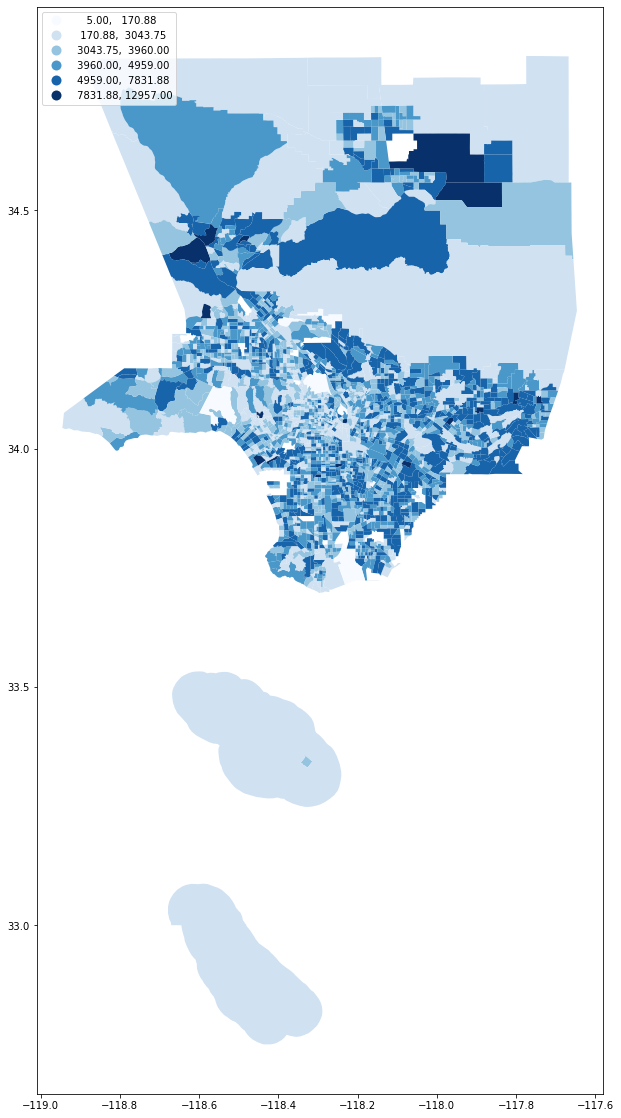

In [29]:
tract_shapes_with_pop_gdf[tract_shapes_with_pop_gdf['total_population'] > 0].plot(
    column='total_population', 
    legend=True, 
    scheme='BoxPlot',  
    cmap='Blues',
    figsize=(20, 20),
    legend_kwds={'loc': 'upper left'}

);

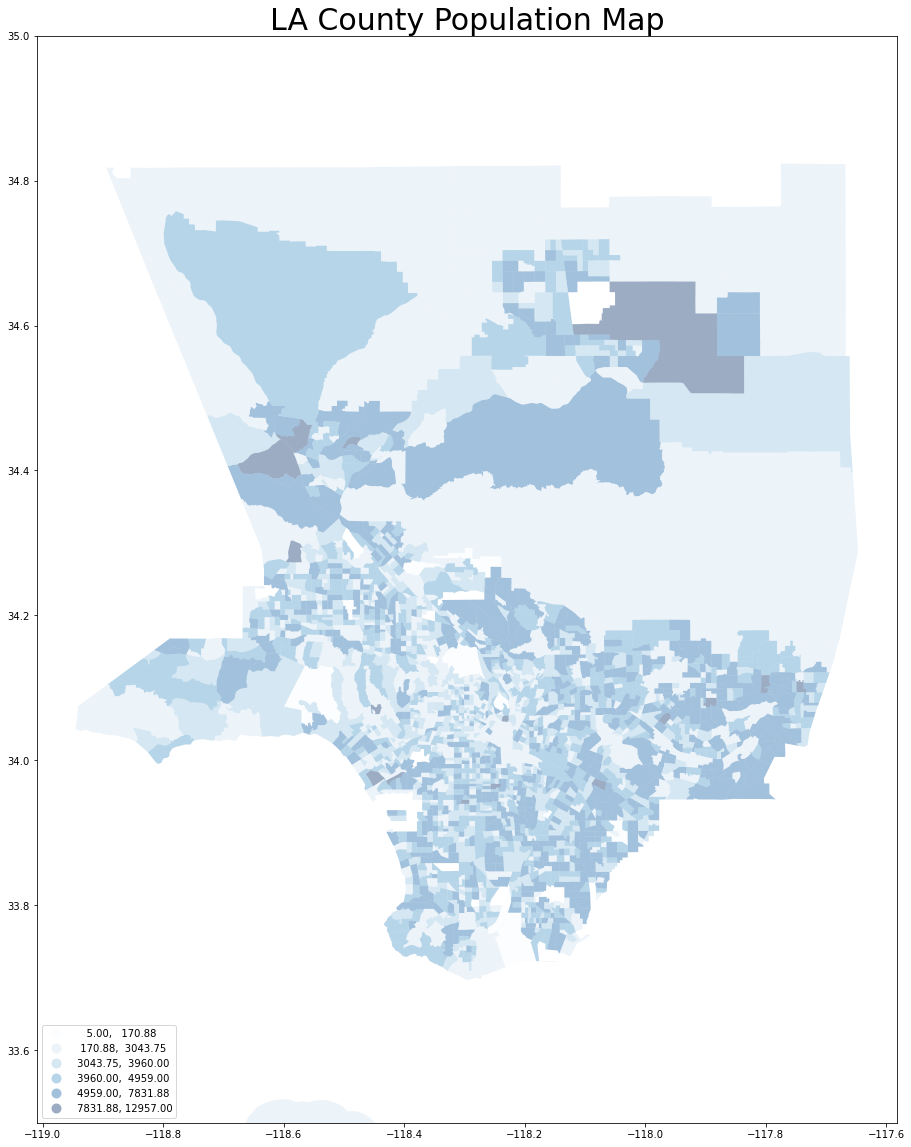

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20))

tract_shapes_with_pop_gdf[tract_shapes_with_pop_gdf['total_population'] > 0].plot(
    ax=ax, 
    alpha = .4,
    column='total_population',
    scheme='BoxPlot',#'FisherJenks',
    legend=True, 
    cmap='Blues', 
    legend_kwds={
        'loc': 'lower left',
        # 'shadow': True,
        # 'facecolor': 'white',
        # 'ncol' : len(tract_shapes_with_pop_gdf),
        # 'mode' : 'expand'
    })


ax.set_title('LA County Population Map', fontdict={'size': 30});
plt.ylim(33.5,35);

#### Save your final DataFrame as a CSV. 

In [31]:
tract_shapes_with_pop_gdf.to_csv('data/la_county_tracts_pop.csv', index=False)

# Assignment: Composability

###  Part 1) Create a Basic Wrapper that will fetch a chosen variable from the API and return it as a pandas dataframe

```
def get_acs_var_for_all_tracts(variable='B01003_001E',year=2019,state='06',county='037'):
    base_url = 'fill_me_in'
    url_query_params = 'fill_me_in'
    
    url = base_url + '?' + url_query_params
    
    # fetch url
    
    # parse json response
    
    # convert to dataframe
    
    # return dataframe
    
```

In [32]:
import json 
import requests
import pandas as pd

def get_acs_var_for_all_tracts(acs_variable='B01003_001E',year=2019,state='06',county='037'):
    # Build URL
    base_url = f'https://api.census.gov/data/{year}/acs/acs5'
    url_query_params = f'get={acs_variable}&for=tract:*&in=state:{state}&in=county:{county}'
    url = base_url + '?' + url_query_params
    print(f'loading from {url}')

    # fetch url
    response = requests.get(url)
    # parse json string into python object (list of lists)
    json_data = json.loads(response.text)
    # convert to dataframe
    pdf = pd.DataFrame(data=json_data[1:],
                       columns=json_data[:1][0])
    # return dataframe
    return pdf

In [33]:
get_acs_var_for_all_tracts()

loading from https://api.census.gov/data/2019/acs/acs5?get=B01003_001E&for=tract:*&in=state:06&in=county:037


,B01003_001E,state,county,tract
0,2373,06,037,482702
1,7267,06,037,500201
2,4988,06,037,500202
3,2973,06,037,500300
4,2703,06,037,500500
...,...,...,...,...
2341,6001,06,037,104108
2342,5441,06,037,104203
2343,3679,06,037,104204
2344,3341,06,037,104403


In [67]:
### Part 2) Given a dataframe from above write a method to pull the correct TIGER line files and a method to read that file and create a geodata frame

import os               # https://docs.python.org/3/library/os.html#module-os
import pathlib as plib  # https://docs.python.org/3/library/pathlib.html
import glob

def tiger_from_api_to_disk(year='2019',state='06'):
    file_url = f'https://www2.census.gov/geo/tiger/TIGER{year}/TRACT/tl_{year}_{state}_tract.zip'
    
    save_path =  plib.Path('assignment_data')
    save_file = f'tl_{year}_{state}_tract.zip'
    if not os.path.exists(save_path):
        print('creating assignemnt_data folder')
        os.makedirs(save_path)
    
    tiger_file_path = save_path / save_file
    print('\nsaving shape files\n')
    urllib.request.urlretrieve(file_url, tiger_file_path)
    return tiger_file_path

def tiger_from_disk_to_gdf(year='2019',state='06',county='037'):   # FILTER TO JUST THE COUNTY YOU WANT
    tiger_path =  plib.Path('assignment_data')
    tiger_file = f'tl_{year}_{state}_tract.zip'
    tiger_file_path = tiger_path / tiger_file
    
    import zipfile
    z = zipfile.ZipFile(tiger_file_path)
    extract_path = tiger_path / 'extracted_tiger_line_shape_files'
    print('extracting tiger line zip file to assignment_data/extracted_tiger_line_shape_files')
    z.extractall(extract_path)
    
    import geopandas as gpd
    print('reading_shape_files')
    all_tracts_gdf = gpd.read_file(f'assignment_data/extracted_tiger_line_shape_files/tl_{year}_{state}_tract.shp')
    print(f'all_tracts_gdf: {all_tracts_gdf}')
    
    
    print('filtering shape files to just county of interest')
    tracts_gdf = all_tracts_gdf[all_tracts_gdf['COUNTYFP']==f'{county}']
    return tracts_gdf

def tiger_from_api_to_disk_to_gdf(year='2019',state='06',county='037'):
    tiger_from_api_to_disk(year,state)
    return tiger_from_disk_to_gdf(year,state,county)
    
### Part 3) Write a Method which calls all the above and joins geometries from the above dataframe to your census data from part 1

def fetch_variable_year_state_county_tract_acs_data_with_geometries_to_gdf(acs_variable='B01003_001E',year=2019,state='06',county='037'):
    county_acs_data_pdf = get_acs_var_for_all_tracts(acs_variable='B01003_001E',year=2019,state='06',county='037')
    print(f'county_acs_data_pdf: {county_acs_data_pdf}')
    county_tracts_gdf = tiger_from_api_to_disk_to_gdf(year=2019,state='06',county='037')
    print(f'county_tracts_gdf: {county_tracts_gdf}')
    
    print('\njoining shapes to census data')
    tract_shapes_with_census_data_gdf = \
        pd.merge(county_tracts_gdf,county_acs_data_pdf,how='inner',left_on='TRACTCE',right_on='tract')

    return tract_shapes_with_census_data_gdf

In [68]:
acs_gdf = fetch_variable_year_state_county_tract_acs_data_with_geometries_to_gdf()
acs_gdf

loading from https://api.census.gov/data/2019/acs/acs5?get=B01003_001E&for=tract:*&in=state:06&in=county:037
county_acs_data_pdf:      B01003_001E state county   tract
0           2373    06    037  482702
1           7267    06    037  500201
2           4988    06    037  500202
3           2973    06    037  500300
4           2703    06    037  500500
...          ...   ...    ...     ...
2341        6001    06    037  104108
2342        5441    06    037  104203
2343        3679    06    037  104204
2344        3341    06    037  104403
2345        3084    06    037  104404

[2346 rows x 4 columns]

saving shape files

extracting tiger line zip file to assignment_data/extracted_tiger_line_shape_files
reading_shape_files
all_tracts_gdf:      STATEFP COUNTYFP TRACTCE        GEOID     NAME              NAMELSAD  \
0         06      037  139301  06037139301  1393.01  Census Tract 1393.01   
1         06      037  139302  06037139302  1393.02  Census Tract 1393.02   
2         06      

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,B01003_001E,state,county,tract
0,06,037,139301,06037139301,1393.01,Census Tract 1393.01,G5020,S,2865657,0,+34.1781538,-118.5581265,"POLYGON ((-118.57150 34.17758, -118.57148 34.1...",4445,06,037,139301
1,06,037,139302,06037139302,1393.02,Census Tract 1393.02,G5020,S,338289,0,+34.1767230,-118.5383655,"POLYGON ((-118.54073 34.18019, -118.54070 34.1...",5000,06,037,139302
2,06,037,139502,06037139502,1395.02,Census Tract 1395.02,G5020,S,1047548,0,+34.1628402,-118.5263110,"POLYGON ((-118.53225 34.16201, -118.53177 34.1...",2917,06,037,139502
3,06,037,139600,06037139600,1396,Census Tract 1396,G5020,S,2477482,0,+34.1640599,-118.5101001,"POLYGON ((-118.51858 34.15858, -118.51858 34.1...",5060,06,037,139600
4,06,037,139701,06037139701,1397.01,Census Tract 1397.01,G5020,S,3396396,2411,+34.1574290,-118.4954117,"POLYGON ((-118.50980 34.15691, -118.50848 34.1...",5320,06,037,139701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2341,06,037,192700,06037192700,1927,Census Tract 1927,G5020,S,531205,0,+34.0800134,-118.2881064,"POLYGON ((-118.29171 34.08359, -118.29051 34.0...",3449,06,037,192700
2342,06,037,194500,06037194500,1945,Census Tract 1945,G5020,S,685341,0,+34.0781753,-118.3695958,"POLYGON ((-118.37880 34.07639, -118.37865 34.0...",2019,06,037,194500
2343,06,037,195100,06037195100,1951,Census Tract 1951,G5020,S,1566302,329063,+34.1022274,-118.2669741,"POLYGON ((-118.27691 34.09584, -118.27680 34.0...",4978,06,037,195100
2344,06,037,195300,06037195300,1953,Census Tract 1953,G5020,S,580349,0,+34.0992506,-118.2836893,"POLYGON ((-118.29177 34.10178, -118.28959 34.1...",3089,06,037,195300


In [69]:
acs_gdf['B01003_001E'] = acs_gdf['B01003_001E'].astype('int')
acs_gdf.dtypes

STATEFP          object
COUNTYFP         object
TRACTCE          object
GEOID            object
NAME             object
NAMELSAD         object
MTFCC            object
FUNCSTAT         object
ALAND             int64
AWATER            int64
INTPTLAT         object
INTPTLON         object
geometry       geometry
B01003_001E       int64
state            object
county           object
tract            object
dtype: object

In [70]:
def plot_acs_data_gdf(gdf,acs_variable='B01003_001E'):
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(20, 20))

    gdf[gdf[acs_variable] > 0].plot(
        ax=ax, 
        alpha = .4,
        column=acs_variable,
        scheme='BoxPlot',#'FisherJenks',
        legend=True, 
        cmap='Blues', 
        legend_kwds={
            'loc': 'lower left',
            # 'shadow': True,
            # 'facecolor': 'white',
            # 'ncol' : len(tract_shapes_with_pop_gdf),
            # 'mode' : 'expand'
        })


    ax.set_title(f'State: 06, County: 037, Varaible: {acs_variable}', fontdict={'size': 30});
    plt.ylim(33.5,35);

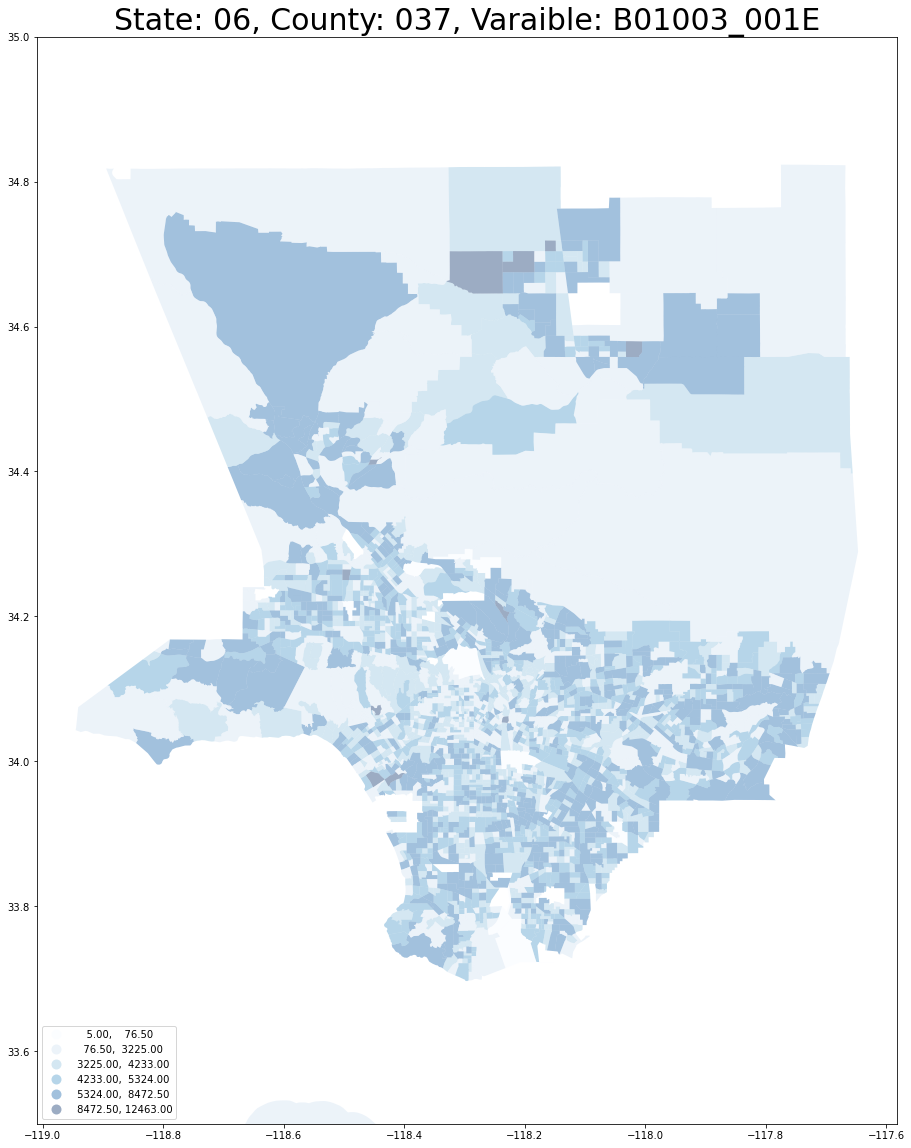

In [71]:
plot_acs_data_gdf(acs_gdf)

### Assignemnt Followup
# wRAPPERS

![wRappers](./img/wRAPPERS.png)

_Eminem, Kendrick Lamar, Dr. Dre, Mary J. Blige, 50 Cent, and Snoop Dogg, February 2022 on the West (Best) Coast (in LA for the Super Bowl)._


## Census Package
> A simple wrapper for the United States Census Bureau’s API.

[`https://pypi.org/project/census/`](https://pypi.org/project/census/)

In [ ]:
# !pip install census

In [72]:
import os
my_census_key = os.getenv('API_CENSUS_GOV_KEY')

In [89]:
from census import Census
import pandas as pd
census = Census(my_census_key)  # PUT YOUR KEY HERE 

pd.DataFrame(
    census.acs5.state_county_tract(   # https://github.com/datamade/census/blob/master/census/core.py#L332
        fields='B01003_001E',
        state_fips='06',
        county_fips='037',
        tract='*'
    )
).convert_dtypes() # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.convert_dtypes.html

,B01003_001E,state,county,tract
0,2373,06,037,482702
1,7267,06,037,500201
2,4988,06,037,500202
3,2973,06,037,500300
4,2703,06,037,500500
...,...,...,...,...
2341,6001,06,037,104108
2342,5441,06,037,104203
2343,3679,06,037,104204
2344,3341,06,037,104403


Look familiar?   So we wrote something which does this, but so did someone else.  
**And, to be frank, theirs does a lot more and is maintained.  That's the magic of libraries.** 

Someone else already wrote the wrapper code!

In [74]:
get_acs_var_for_all_tracts()

loading from https://api.census.gov/data/2019/acs/acs5?get=B01003_001E&for=tract:*&in=state:06&in=county:037


,B01003_001E,state,county,tract
0,2373,06,037,482702
1,7267,06,037,500201
2,4988,06,037,500202
3,2973,06,037,500300
4,2703,06,037,500500
...,...,...,...,...
2341,6001,06,037,104108
2342,5441,06,037,104203
2343,3679,06,037,104204
2344,3341,06,037,104403


```

In Review: 

Wrappers: 

┌──Python-Census-Library──┐
│                         │
│     ┌──Census-API───┐   │
│     │               │   │
│     │     Magic     │   │
│     │               │   │
│     └───────────────┘   │
└─────────────────────────┘


Here's an example you may remember

Folium wraps Javascript's `leaflet.js` library. You can manipulate your data in Python, then visualize it in on a Leaflet map via folium. 

https://python-visualization.github.io/folium/


┌──Folium─(py)────────────┐
│                         │
│     ┌──Leaflet─(js)─┐   │
│     │               │   │
│     │     Magic     │   │
│     │               │   │
│     └───────────────┘   │
└─────────────────────────┘

```

-----------

## Potential Assignment:  Create a Choropleth of Santa Monica Census Tract Populations
- Fetch ACS Data via the census pacage 

In [75]:
import geopandas as gpd
tracts_gdf = gpd.read_file('./data/extracted_tiger_line_shape_files/')

<AxesSubplot:>

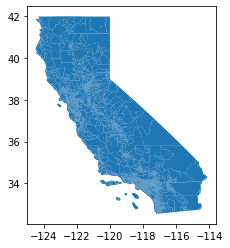

In [76]:
tracts_gdf.plot()

In [77]:
la_neighborhoods_url = 'https://usc.data.socrata.com/api/geospatial/r8qd-yxsr?method=export&format=GeoJSON'
la_neighborhoods_gdf = gpd.read_file(la_neighborhoods_url) 

santa_monica_neighborhood_gdf = la_neighborhoods_gdf[la_neighborhoods_gdf['name'] == 'Santa Monica']
santa_monica_neighborhood_gdf

,external_i,name,location,latitude,slug_1,sqmi,display_na,set,slug,longitude,name_1,kind,type,geometry
200,santa-monica,Santa Monica,POINT(34.021860499124415 -118.48056671004807),-118.48056671004807,None,8.56505645013,Santa Monica L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),santa-monica,34.021860499124415,None,L.A. County Neighborhood (Current),standalone-city,"MULTIPOLYGON (((-118.48398 34.04163, -118.4837..."


In [78]:
tracts_4326_gdf = tracts_gdf.to_crs(epsg=4326)

In [79]:
tracts_4326_gdf

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,029,004402,06029004402,44.02,Census Tract 44.02,G5020,S,1865739,0,+35.5917343,-119.3337642,"POLYGON ((-119.33828 35.58144, -119.33827 35.5..."
1,06,047,000802,06047000802,8.02,Census Tract 8.02,G5020,S,2321653,0,+37.3433591,-120.5854604,"POLYGON ((-120.59599 37.34121, -120.59596 37.3..."
2,06,085,501402,06085501402,5014.02,Census Tract 5014.02,G5020,S,522620,0,+37.3453341,-121.8665169,"POLYGON ((-121.87381 37.34412, -121.87361 37.3..."
3,06,005,000102,06005000102,1.02,Census Tract 1.02,G5020,S,456204155,7940832,+38.5496993,-120.2509786,"POLYGON ((-120.61017 38.41561, -120.61000 38.4..."
4,06,029,004901,06029004901,49.01,Census Tract 49.01,G5020,S,1459379,0,+35.7837173,-119.2462266,"POLYGON ((-119.25262 35.79044, -119.25259 35.7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9124,06,065,041407,06065041407,414.07,Census Tract 414.07,G5020,S,1614719,0,+33.9110608,-117.4726363,"POLYGON ((-117.48304 33.91183, -117.48299 33.9..."
9125,06,065,041408,06065041408,414.08,Census Tract 414.08,G5020,S,1422469,0,+33.9042089,-117.4691610,"POLYGON ((-117.48347 33.89935, -117.48321 33.8..."
9126,06,065,041410,06065041410,414.10,Census Tract 414.10,G5020,S,1953877,0,+33.8800908,-117.5305087,"POLYGON ((-117.54746 33.88190, -117.54721 33.8..."
9127,06,013,338101,06013338101,3381.01,Census Tract 3381.01,G5020,S,1128292,0,+37.9489174,-122.0424911,"POLYGON ((-122.05158 37.94759, -122.05121 37.9..."


In [157]:
santa_monica_tracts_gdf = gpd.sjoin(
    tracts_4326_gdf,
    santa_monica_neighborhood_gdf,
    how='inner',
    predicate='intersects'
)

In [158]:
santa_monica_tracts_gdf.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,latitude,slug_1,sqmi,display_na,set,slug,longitude,name_1,kind,type
1110,06,037,701902,06037701902,7019.02,Census Tract 7019.02,G5020,S,1789787,440550,...,-118.48056671004807,None,8.56505645013,Santa Monica L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),santa-monica,34.021860499124415,None,L.A. County Neighborhood (Current),standalone-city
1111,06,037,702102,06037702102,7021.02,Census Tract 7021.02,G5020,S,930824,200615,...,-118.48056671004807,None,8.56505645013,Santa Monica L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),santa-monica,34.021860499124415,None,L.A. County Neighborhood (Current),standalone-city
2518,06,037,701304,06037701304,7013.04,Census Tract 7013.04,G5020,S,2080500,250093,...,-118.48056671004807,None,8.56505645013,Santa Monica L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),santa-monica,34.021860499124415,None,L.A. County Neighborhood (Current),standalone-city
3527,06,037,702202,06037702202,7022.02,Census Tract 7022.02,G5020,S,1011696,0,...,-118.48056671004807,None,8.56505645013,Santa Monica L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),santa-monica,34.021860499124415,None,L.A. County Neighborhood (Current),standalone-city
3546,06,037,702300,06037702300,7023,Census Tract 7023,G5020,S,2591889,0,...,-118.48056671004807,None,8.56505645013,Santa Monica L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),santa-monica,34.021860499124415,None,L.A. County Neighborhood (Current),standalone-city


<AxesSubplot:>

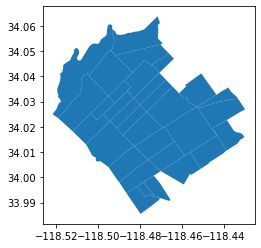

In [85]:
santa_monica_tracts_gdf.plot()

In [86]:
santa_monica_tracts_gdf.to_file("./data/santa_monica_tracts.geojson", driver='GeoJSON')

In [205]:
populations_by_tract_pdf = pd.DataFrame(
    census.acs5.state_county_tract(   # https://github.com/datamade/census/blob/master/census/core.py#L332
        fields='B01003_001E',
        state_fips='06',
        county_fips='037',
        tract='*'
    )
)#.convert_dtypes() # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.convert_dtypes.html

In [206]:
populations_by_tract_pdf['GEOID'] = populations_by_tract_pdf['state'].astype(str) + populations_by_tract_pdf['county'].astype(str) + populations_by_tract_pdf['tract'].astype(str) 

In [214]:
populations_by_tract_pdf.merge(populations_by_tract_pdf, how='inner', on='GEOID')

,population_x,state_x,county_x,tract_x,GEOID,population_y,state_y,county_y,tract_y
0,2373.0,06,037,482702,06037482702,2373.0,06,037,482702
1,7267.0,06,037,500201,06037500201,7267.0,06,037,500201
2,4988.0,06,037,500202,06037500202,4988.0,06,037,500202
3,2973.0,06,037,500300,06037500300,2973.0,06,037,500300
4,2703.0,06,037,500500,06037500500,2703.0,06,037,500500
...,...,...,...,...,...,...,...,...,...
2341,6001.0,06,037,104108,06037104108,6001.0,06,037,104108
2342,5441.0,06,037,104203,06037104203,5441.0,06,037,104203
2343,3679.0,06,037,104204,06037104204,3679.0,06,037,104204
2344,3341.0,06,037,104403,06037104403,3341.0,06,037,104403


In [207]:
populations_by_tract_pdf.rename({'B01003_001E':'population'},axis='columns',inplace=True)

In [208]:
type(santa_monica_tracts_gdf['GEOID'][1110])

str

In [209]:
santa_monica_tracts_gdf['GEOID'].dtype

dtype('O')

In [210]:
populations_by_tract_pdf['GEOID'].dtypes

dtype('O')

In [211]:
type(populations_by_tract_pdf['GEOID'][0])

str

In [219]:
santa_monica_tracts_with_pop_pdf = santa_monica_tracts_gdf.merge(populations_by_tract_pdf, how='inner',on='GEOID')

In [220]:
santa_monica_tracts_with_pop_pdf.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,set,slug,longitude,name_1,kind,type,population,state,county,tract
0,06,037,701902,06037701902,7019.02,Census Tract 7019.02,G5020,S,1789787,440550,...,L.A. County Neighborhoods (Current),santa-monica,34.021860499124415,None,L.A. County Neighborhood (Current),standalone-city,4659.0,06,037,701902
1,06,037,702102,06037702102,7021.02,Census Tract 7021.02,G5020,S,930824,200615,...,L.A. County Neighborhoods (Current),santa-monica,34.021860499124415,None,L.A. County Neighborhood (Current),standalone-city,6065.0,06,037,702102
2,06,037,701304,06037701304,7013.04,Census Tract 7013.04,G5020,S,2080500,250093,...,L.A. County Neighborhoods (Current),santa-monica,34.021860499124415,None,L.A. County Neighborhood (Current),standalone-city,6212.0,06,037,701304
3,06,037,702202,06037702202,7022.02,Census Tract 7022.02,G5020,S,1011696,0,...,L.A. County Neighborhoods (Current),santa-monica,34.021860499124415,None,L.A. County Neighborhood (Current),standalone-city,3969.0,06,037,702202
4,06,037,702300,06037702300,7023,Census Tract 7023,G5020,S,2591889,0,...,L.A. County Neighborhoods (Current),santa-monica,34.021860499124415,None,L.A. County Neighborhood (Current),standalone-city,6839.0,06,037,702300


In [230]:
sm_single_gdf = santa_monica_tracts_gdf.dissolve()

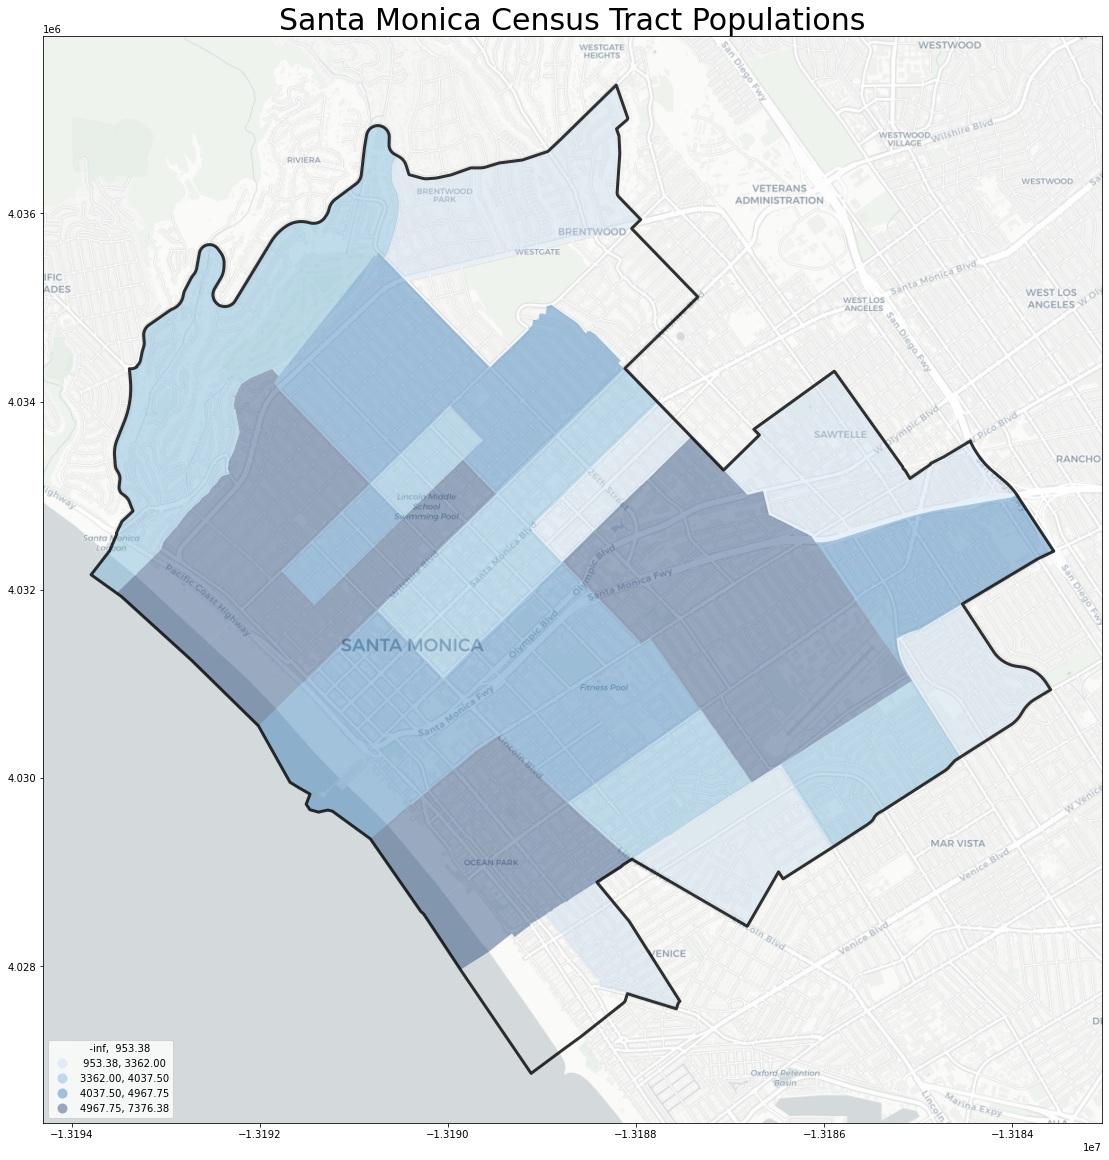

In [233]:
import matplotlib.pyplot as plt
import contextily as ctx

fig, ax = plt.subplots(figsize=(20, 20))

santa_monica_tracts_with_pop_pdf[santa_monica_tracts_with_pop_pdf['population'] >= 0].to_crs(epsg=3857).plot(
    ax=ax, 
    alpha = .4,
    column='population',
    scheme='BoxPlot',#'FisherJenks',
    legend=True, 
    cmap='Blues', 
    legend_kwds={
        'loc': 'lower left',
        # 'shadow': True,
        # 'facecolor': 'white',
        # 'ncol' : len(tract_shapes_with_pop_gdf),
        # 'mode' : 'expand'
    })
sm_single_gdf.to_crs(epsg=3857).plot(ax=ax,alpha=0.8, facecolor='none', edgecolor='k',linewidth=3)

ctx.add_basemap(ax, source="http://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}.png")

ax.set_title('Santa Monica Census Tract Populations', fontdict={'size': 30});